## Import Libraries

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import pickle


## Data Understanding

In [2]:
data = pd.read_csv("loan_data_2007_2014.csv", low_memory=False)
data.head(10)

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   
5           5  1075269    1311441       5000         5000           5000.0   
6           6  1069639    1304742       7000         7000           7000.0   
7           7  1072053    1288686       3000         3000           3000.0   
8           8  1071795    1306957       5600         5600           5600.0   
9           9  1071570    1306721       5375         5375           5350.0   

         term  int_rate  installment grade  ... total_bal_il il_util  \
0   36 months     10.65       162.87     B  ...          NaN     NaN   
1   60 months     15.27        59.83     C  ...          NaN     NaN   
2   36 months     15.96        84.33     C  ...          NaN     NaN   
3   36 months     13.49       339.31     C  ...          NaN     NaN   
4   60 months     12.69        67.79     B  ...          NaN     NaN   
5   36 months      7.90       156.46     A  ...          NaN     NaN   
6   60 months     15.96       170.08     C  ...          NaN     NaN   
7   36 months     18.64       109.43     E  ...          NaN     NaN   
8   60 months     21.28       152.39     F  ...          NaN     NaN   
9   60 months     12.69       121.45     B  ...          NaN     NaN   

  open_rv_12m open_rv_24m  max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN         NaN         NaN      NaN              NaN    NaN   
1         NaN         NaN         NaN      NaN              NaN    NaN   
2         NaN         NaN         NaN      NaN              NaN    NaN   
3         NaN         NaN         NaN      NaN              NaN    NaN   
4         NaN         NaN         NaN      NaN              NaN    NaN   
5         NaN         NaN         NaN      NaN              NaN    NaN   
6         NaN         NaN         NaN      NaN              NaN    NaN   
7         NaN         NaN         NaN      NaN              NaN    NaN   
8         NaN         NaN         NaN      NaN              NaN    NaN   
9         NaN         NaN         NaN      NaN              NaN    NaN   

  total_cu_tl inq_last_12m  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  
5         NaN          NaN  
6         NaN          NaN  
7         NaN          NaN  
8         NaN          NaN  
9         NaN          NaN  

[10 rows x 75 columns]

In [3]:
data.shape

(466285, 75)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
for col in data:
    print(f"{col}:{data[col].nunique()}")

Unnamed: 0:466285
id:466285
member_id:466285
loan_amnt:1352
funded_amnt:1354
funded_amnt_inv:9854
term:2
int_rate:506
installment:55622
grade:7
sub_grade:35
emp_title:205475
emp_length:11
home_ownership:6
annual_inc:31901
verification_status:3
issue_d:91
loan_status:9
pymnt_plan:2
url:466285
desc:124436
purpose:14
title:63099
zip_code:888
addr_state:50
dti:3997
delinq_2yrs:24
earliest_cr_line:664
inq_last_6mths:28
mths_since_last_delinq:145
mths_since_last_record:123
open_acc:62
pub_rec:26
revol_bal:58142
revol_util:1269
total_acc:112
initial_list_status:2
out_prncp:135665
out_prncp_inv:141189
total_pymnt:351609
total_pymnt_inv:347659
total_rec_prncp:172713
total_rec_int:270249
total_rec_late_fee:5808
recoveries:22773
collection_recovery_fee:20275
last_pymnt_d:98
last_pymnt_amnt:198194
next_pymnt_d:100
last_credit_pull_d:103
collections_12_mths_ex_med:9
mths_since_last_major_derog:162
policy_code:1
application_type:1
annual_inc_joint:0
dti_joint:0
verification_status_joint:0
acc_now_de

In [6]:
data.isna()

Unnamed: 0     id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0            False  False      False      False        False            False   
1            False  False      False      False        False            False   
2            False  False      False      False        False            False   
3            False  False      False      False        False            False   
4            False  False      False      False        False            False   
...            ...    ...        ...        ...          ...              ...   
466280       False  False      False      False        False            False   
466281       False  False      False      False        False            False   
466282       False  False      False      False        False            False   
466283       False  False      False      False        False            False   
466284       False  False      False      False        False            False   

         term  int_rate  installment  grade  ...  total_bal_il  il_util  \
0       False     False        False  False  ...          True     True   
1       False     False        False  False  ...          True     True   
2       False     False        False  False  ...          True     True   
3       False     False        False  False  ...          True     True   
4       False     False        False  False  ...          True     True   
...       ...       ...          ...    ...  ...           ...      ...   
466280  False     False        False  False  ...          True     True   
466281  False     False        False  False  ...          True     True   
466282  False     False        False  False  ...          True     True   
466283  False     False        False  False  ...          True     True   
466284  False     False        False  False  ...          True     True   

        open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  \
0              True         True        True      True              True   
1              True         True        True      True              True   
2              True         True        True      True              True   
3              True         True        True      True              True   
4              True         True        True      True              True   
...             ...          ...         ...       ...               ...   
466280         True         True        True      True             False   
466281         True         True        True      True             False   
466282         True         True        True      True             False   
466283         True         True        True      True             False   
466284         True         True        True      True             False   

        inq_fi  total_cu_tl  inq_last_12m  
0         True         True          True  
1         True         True          True  
2         True         True          True  
3         True         True          True  
4         True         True          True  
...        ...          ...           ...  
466280    True         True          True  
466281    True         True          True  
466282    True         True          True  
466283    True         True          True  
466284    True         True          True  

[466285 rows x 75 columns]

In [7]:
data.duplicated().sum()

0

## Data Preparation

In [8]:
df = data.copy()

In [9]:
# Delete the column that has no values and unneeded columns
df.drop(columns=['Unnamed: 0',    
                 'id',
                 'member_id',
                 'sub_grade',
                 'emp_title',
                 'issue_d',
                 'url',
                 'verification_status',
                 'desc',
                 'purpose',
                 'policy_code',
                 'application_type',
                 'annual_inc_joint',
                 'dti_joint',
                 'verification_status_joint',
                 'open_acc_6m',
                 'open_il_6m',
                 'open_il_12m',
                 'open_il_24m',
                 'mths_since_rcnt_il',
                 'total_bal_il',
                 'il_util',
                 'open_rv_12m',
                 'open_rv_24m',
                 'max_bal_bc',
                 'all_util',
                 'inq_fi',
                 'total_cu_tl',
                 'inq_last_12m'], axis=1, inplace=True)

In [10]:
# Drop the term column from 'months'
df.term=df.term.apply(lambda x:str(x).replace('months'," "))
# Convert the term column to an int
df.term=df.term.apply(lambda x:int(x))
df.term

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term, Length: 466285, dtype: int64

In [11]:
# binary classification
label_categories = [
    (0, ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Current']),
    (1, ['Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period', 
         'Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off'])
]

# function to apply the transformation
def classify_label(text):
    for category, matches in label_categories:
        if any(match in text for match in matches):
            return category
    return None

df.loc[:, 'label'] = df['loan_status'].apply(classify_label)
df = df.drop('loan_status', axis=1)

In [12]:
# Label encoder for categorical columns
labelencoder = LabelEncoder()
df['grade'] = labelencoder.fit_transform(df['grade'])
df['home_ownership'] = labelencoder.fit_transform(df['home_ownership'])
df['emp_length'] = labelencoder.fit_transform(df['emp_length'])

In [13]:
for column in df: 
    if df[column].dtype == 'object': 
        df = df.drop(column, axis=1) 

In [14]:
# Handling missing values num_col
for col in df.columns:
  missing_values = df[col].isnull().sum()
  if missing_values > 0:
    print(f"{col} has {missing_values} missing values")

annual_inc has 4 missing values
delinq_2yrs has 29 missing values
inq_last_6mths has 29 missing values
mths_since_last_delinq has 250351 missing values
mths_since_last_record has 403647 missing values
open_acc has 29 missing values
pub_rec has 29 missing values
revol_util has 340 missing values
total_acc has 29 missing values
collections_12_mths_ex_med has 145 missing values
mths_since_last_major_derog has 367311 missing values
acc_now_delinq has 29 missing values
tot_coll_amt has 70276 missing values
tot_cur_bal has 70276 missing values
total_rev_hi_lim has 70276 missing values


In [15]:
for col in df.columns: 
    df[col].fillna(df[col].mean(), inplace=True)
print('Fillna success')

Fillna success


In [16]:
numeric_col = df.copy()
numeric_col.drop(columns=['grade','emp_length','home_ownership','label'], axis=1, inplace=True)

In [17]:
plt.figure(figsize=(25,25))
for i,v in enumerate(df):
    plt.subplot(7,6,i+1)
    sns.boxplot(x=v, data=df,
                color='grey',
                notch=True,
                fliersize=10,
                flierprops={"marker": "o"})
plt.show()

In [19]:
# Drop outliers
def detect_outliers(df, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

numerical_columns = list(df.select_dtypes('number').columns)
print('Numerical columns: {}'.format(numerical_columns))
outliers_to_drop = detect_outliers(df, 2, df)
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

Numerical columns: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'label']
We will drop these 194840 indices:  [42655, 42739, 42800, 42853, 43053, 43123, 43145, 43443, 43922, 43978, 44113, 44345, 44352, 44500, 44721, 44731, 44807, 44868, 45034, 45185, 45291, 45520, 45555, 45581, 45654, 45708, 45766, 45798, 46050, 46241, 46286, 46378, 46585, 46666, 46770, 47028, 47049, 47094, 47259, 47297, 47321, 47380, 47389, 47426, 47564, 47579, 47654, 4

In [20]:
# Drop outliers and reset index

print("Before: {} rows".format(len(df)))
dataset = df.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(dataset)))

Before: 466285 rows
After: 271445 rows


In [23]:
# the label looks unbalanced and should be finalized later
print('Accepted', round(dataset['label'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Rejected', round(dataset['label'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Accepted 55.4 % of the dataset
Rejected 2.81 % of the dataset


In [24]:
numeric_col.describe().T

count           mean            std      min  \
loan_amnt                    466285.0   14317.277577    8286.509164   500.00   
funded_amnt                  466285.0   14291.801044    8274.371300   500.00   
funded_amnt_inv              466285.0   14222.329888    8297.637788     0.00   
term                         466285.0      42.605334      10.719040    36.00   
int_rate                     466285.0      13.829236       4.357587     5.42   
installment                  466285.0     432.061201     243.485550    15.67   
annual_inc                   466285.0   73277.381470   54963.332902  1896.00   
dti                          466285.0      17.218758       7.851121     0.00   
delinq_2yrs                  466285.0       0.284678       0.797340     0.00   
inq_last_6mths               466285.0       0.804745       1.091564     0.00   
mths_since_last_delinq       466285.0      34.104430      14.820469     0.00   
mths_since_last_record       466285.0      74.306012      11.126496     0.00   
open_acc                     466285.0      11.187069       4.987371     0.00   
pub_rec                      466285.0       0.160564       0.510847     0.00   
revol_bal                    466285.0   16230.203487   20676.245152     0.00   
revol_util                   466285.0      56.176947      23.723974     0.00   
total_acc                    466285.0      25.064430      11.599780     1.00   
out_prncp                    466285.0    4410.062342    6355.078769     0.00   
out_prncp_inv                466285.0    4408.452258    6353.198001     0.00   
total_pymnt                  466285.0   11540.686220    8265.627112     0.00   
total_pymnt_inv              466285.0   11469.892747    8254.157579     0.00   
total_rec_prncp              466285.0    8866.014657    7031.687997     0.00   
total_rec_int                466285.0    2588.677225    2483.809661     0.00   
total_rec_late_fee           466285.0       0.650129       5.265730     0.00   
recoveries                   466285.0      85.344211     552.216084     0.00   
collection_recovery_fee      466285.0       8.961534      85.491437     0.00   
last_pymnt_amnt              466285.0    3123.913796    5554.737393     0.00   
collections_12_mths_ex_med   466285.0       0.009085       0.108631     0.00   
mths_since_last_major_derog  466285.0      42.852547       9.980298     0.00   
acc_now_delinq               466285.0       0.004002       0.068635     0.00   
tot_coll_amt                 466285.0     191.913517   13482.717026     0.00   
tot_cur_bal                  466285.0  138801.713385  140183.792163     0.00   
total_rev_hi_lim             466285.0   30379.087771   34325.710293     0.00   

                                      25%            50%            75%  \
loan_amnt                     8000.000000   12000.000000   20000.000000   
funded_amnt                   8000.000000   12000.000000   20000.000000   
funded_amnt_inv               8000.000000   12000.000000   19950.000000   
term                            36.000000      36.000000      60.000000   
int_rate                        10.990000      13.660000      16.490000   
installment                    256.690000     379.890000     566.580000   
annual_inc                   45000.000000   63000.000000   88953.000000   
dti                             11.360000      16.870000      22.780000   
delinq_2yrs                      0.000000       0.000000       0.000000   
inq_last_6mths                   0.000000       0.000000       1.000000   
mths_since_last_delinq          34.000000      34.104430      34.104430   
mths_since_last_record          74.306012      74.306012      74.306012   
open_acc                         8.000000      10.000000      14.000000   
pub_rec                          0.000000       0.000000       0.000000   
revol_bal                     6413.000000   11764.000000   20333.000000   
revol_util                      39.200000      57.500000      74.700000   
total_acc                       17.0

## EDA (Exploratory Data Analysis)

In [25]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),cbar = True,cmap = 'GnBu', annot =True, linewidths=4, linecolor='white')
plt.title("Correlation Among Variables")
plt.show()

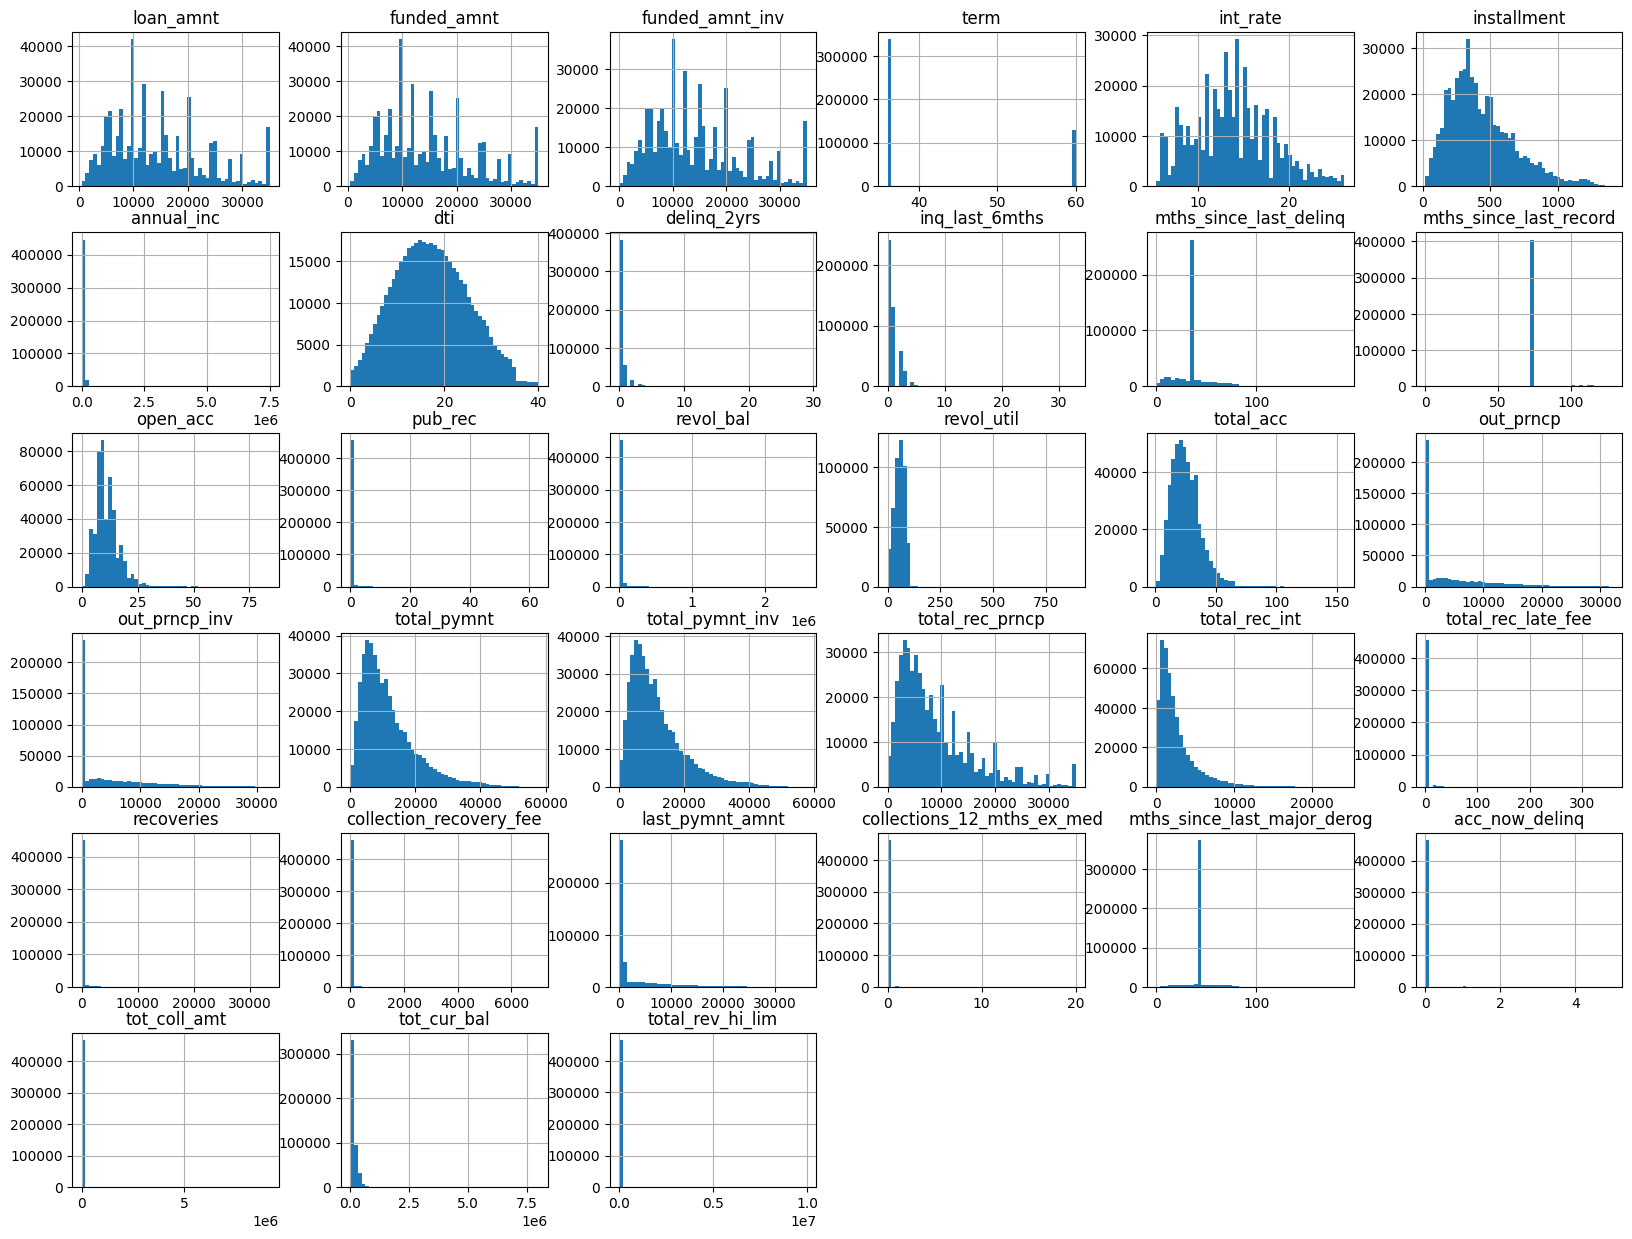

In [26]:
numeric_col.hist(bins=50, figsize=(20,15))
plt.show()

In [27]:
plt.figure(figsize = (12, 9))
ax = sns.countplot(x="grade", data=data, hue='loan_status')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("grade based loan status")
plt.xlabel("grade")
plt.xticks()
plt.show()

In [28]:
plt.figure(figsize = (12, 9))
ax = sns.countplot(x="emp_length", data=data, hue='loan_status')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("emp length based loan status")
plt.xlabel("emp length")
plt.xticks()
plt.show()

## Model Building

In [31]:
#Train and test split
Y = dataset['label']
X = dataset.drop('label',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=30, test_size=0.2, shuffle = True)

In [33]:
# SMOTE
sm = SMOTE()

# we can use the same train set created before, and add 'Charged Off' samples
X_train, y_train = sm.fit_resample(X_train, y_train)

In [34]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
model = SVC() 
model.fit(X_train, y_train)

print ("Training succsess")

Training succsess


## Model Evaluation

In [38]:
from sklearn.metrics import classification_report

test = model.predict(X_test)

print ("Testing selesai")

print(classification_report(y_test, test))

Testing selesai
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     51620
           1       0.64      0.71      0.67      2669

    accuracy                           0.97     54289
   macro avg       0.81      0.85      0.83     54289
weighted avg       0.97      0.97      0.97     54289



In [44]:
#Displaying the training model results with a heatmap visualization of the confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, test)), ('0', '1'), ('0', '1'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Support Vector Machine)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [45]:
#save model pickle
pickle.dump(model, open("model-svm.pkl", "wb"))